
# COURSE: Neural signal processing and analysis: Zero to hero
## SESSION: Introduction
### TEACHER: Mike X Cohen, sincxpress.com

##### become familiar with the sample data used in class


In [481]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from mne.viz import plot_topomap
import mne

# Load the sample EEG data
eeg_data = loadmat('sampleEEGdata.mat')
eeg = eeg_data['EEG']
eeg_times = eeg['times'][0][0].T

# Compute the ERP of each channel
# (remember that the ERP is the time-domain average across all trials at each time point)
erp = np.mean(eeg['data'][0][0], axis=2)

(-400.0, 1200.0)

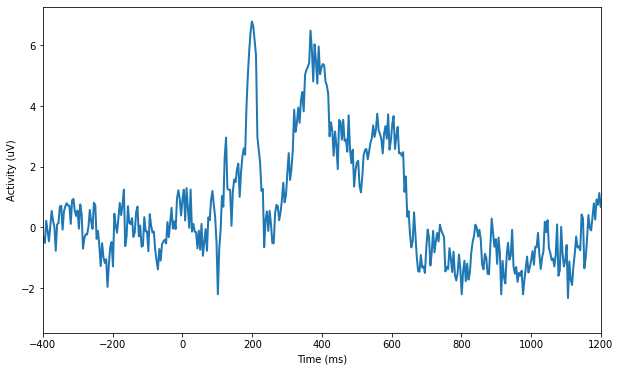

In [290]:
chan2plot = 'fcz'
chanlocs = []
for i in eeg['chanlocs'][0][0]['labels'][0]:
    chanlocs.append(i[0].lower())
chanlocs = np.array(chanlocs)

chan_idx = np.where(chanlocs == chan2plot)[0][0]

plt.figure(figsize=(10,6))
plt.plot(eeg_times, erp[chan_idx], linewidth=2)
plt.xlabel('Time (ms)'), plt.ylabel('Activity (uV)')
plt.xlim([-400, 1200])

In [348]:
def pol2cart(theta, rho):
    theta_rad = np.deg2rad(theta)
    x = rho * np.cos(theta_rad)
    y = rho * np.sin(theta_rad)
    return x, y

In [374]:
head_rad = 0.095
plot_rad = 0.51
squeezefac = head_rad/plot_rad

eeg_chanlocs = []
for i in range(64):
    local_chanloc = []
    x = list(eeg['chanlocs'][0][0][0][i])
    th = x[1][0][0]
    rd = x[2][0][0]
    
    th, rd = pol2cart(th,rd)
    eeg_chanlocs.append([rd * squeezefac,th*squeezefac])

eeg_chanlocs = np.array(eeg_chanlocs)

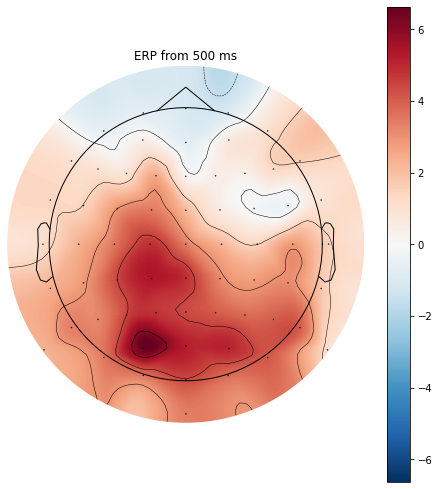

In [384]:
# Plot topographical maps
time2plot = 500 # in ms
# convert time in ms to time in indices
tidx = np.argmin(np.abs(eeg_times - time2plot))

fig, ax = plt.subplots(figsize=(8,8))
im, _ = plot_topomap(erp[:, tidx], eeg_chanlocs, axes=ax, show=False, 
                     cmap='RdBu_r', ch_type='eeg', size = 200,
                    contours=6)
plt.colorbar(im)

# Add a title
plt.title('ERP from {} ms'.format(time2plot))
plt.show()

## Now for sample CSD V1 Data

In [385]:
# load the laminar data
laminar_data = loadmat('v1_laminar.mat')

In [397]:
timevec.shape

(1, 1527)

In [401]:
csd.shape

(16, 1527, 200)

In [415]:
np.squeeze(np.mean(csd[6,:,:], axis=1)).shape

(1527,)

(-0.1, 1.4)

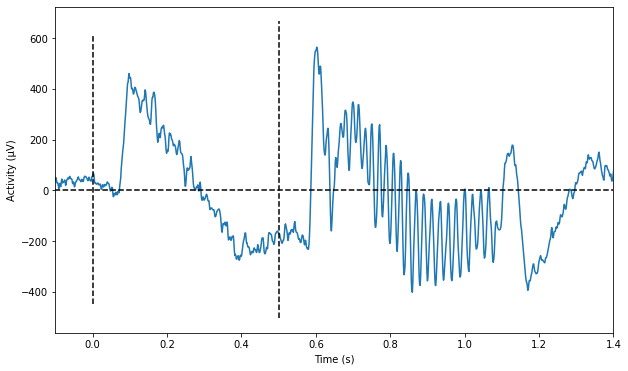

In [434]:
# Extract variables from the loaded mat file
csd = laminar_data['csd']
timevec = laminar_data['timevec']

# Plot ERP from channel 7
plt.figure(3, figsize=(10,6))
plt.plot(timevec.T, np.mean(csd[6, :, :], axis=1))
plt.plot(plt.gca().get_xlim(), [0, 0], 'k--')
plt.plot([0, 0], plt.gca().get_ylim(), 'k--')
plt.plot(np.array([0, 0]) + 0.5, plt.gca().get_ylim(), 'k--')
plt.xlabel('Time (s)')
plt.ylabel('Activity (\u03BCV)')
plt.xlim(-0.1, 1.4)

In [496]:
Z.shape

(16, 1527)

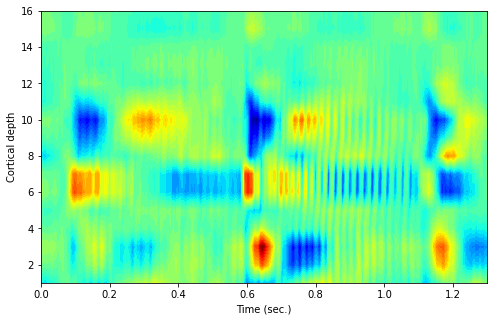

In [495]:
X = timevec
Y = np.arange(1,17)
Z = np.squeeze(np.mean(csd, axis=2))

# Plot depth-by-time image of ERP
plt.figure(4, figsize=(8,5))
plt.contourf(X.reshape((1527,)), Y, Z, 40, cmap='jet')
plt.xlim(0, 1.3)
plt.xlabel('Time (sec.)')
plt.ylabel('Cortical depth')

# Show the plots
plt.show()